# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [6]:
!pip install scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 22.3 MB/s eta 0:00:0000:0100:01


The following is for CS3820 Introduction to AI with instructor Dr. Moin demonstrating a machine learning model applied to intersection traffic data. The goal of this model is to take the data provided by traffic control cameras and predict the amount of cars in the intersection for a future time range based on the time range the data was taken.

The traffic control cameras are able to provide the number of cars crossing an intersection as time goes forward. Since we care to predict the number of cars for a future duration of time, time will be our feature.

Although we do not have enough data, we can anticipate for the data to be organized like so...


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.ticker as ticker

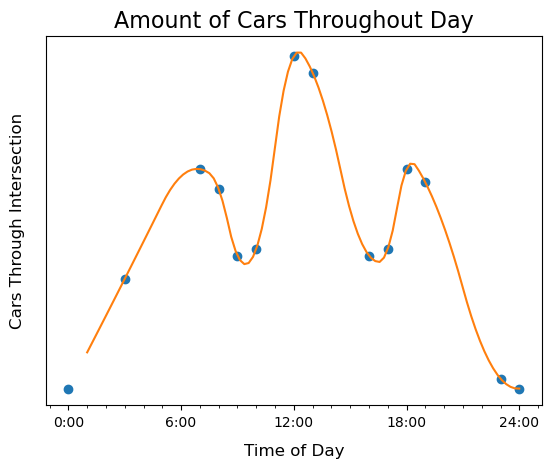

In [41]:
fig, ax = plt.subplots()

x = [0, 3, 7, 8, 9, 10, 12, 13, 16, 17, 18, 19, 23, 24]
y = [0, 33, 66, 60, 40, 42, 100, 95, 40, 42, 66, 62, 3, 0]

# Create an interpolation function
f = interp1d(x,y, kind='quadratic')

# Generate new x values for a smoother curve
x_new = np.linspace(1, 24, 100)

# Interpolate y value using the new x values
y_new = f(x_new)



ax.plot(x,y, 'o')
ax.plot(x_new, y_new, '-')
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.set_title('Amount of Cars Throughout Day', fontsize=16)
ax.set_ylabel('Cars Through Intersection', fontsize=12, labelpad=15)
ax.set_xlabel('Time of Day', fontsize=12, labelpad=10)

plt.tick_params(left = False, labelleft = False)
plt.xticks([0, 6, 12, 18, 24],["0:00", "6:00", "12:00", "18:00", "24:00"])
plt.show()

The graph above shows what we anticipate the traffic pattern to look like. Of course it is not going to be so smooth. Since the amount of data a single 20 minute video footage is so large, we are going to narrow down our focus to a notable time of traffic, one of the busier times. Let's take a look at morning rush hour from 7:00 am to 8:00 am.

As we collect data from 7:00 to 8:00 am day by day, we can graph it.

In [18]:
import random

[65.84393002845646,
 67.93031608991657,
 68.43533765765893,
 66.01904391085714,
 61.81113026716974,
 61.73678717037423,
 62.118046308611014,
 59.13112417055769,
 68.89246840859832,
 66.01389936904611,
 64.32343447418592,
 63.6669430209222,
 65.96167910795258,
 61.27022712655946,
 62.483385298711184,
 60.31035375126134,
 60.25820965209773,
 71.9591160906821,
 67.07678294616143,
 65.48286084913066,
 65.97037357278677,
 68.53322707410695,
 70.79970870987741,
 61.58224468330564,
 72.72624559240172,
 63.7782198045033,
 70.16625643770918,
 66.82343383279066,
 66.65733856502607,
 64.53387166484197,
 68.03134799648792,
 69.00364142560078,
 61.78643919948057,
 63.62446465719343,
 73.3146885184539,
 74.5269076324596,
 67.22631093846834,
 65.28933179869406,
 63.71549399993177,
 64.5263049249824,
 67.01815922138701,
 64.91553872318765,
 59.86193516124386,
 72.09323463416584,
 58.11629872148316,
 67.81358141285436,
 64.93667518411519,
 67.70402662533257,
 65.48789067641431,
 65.55711341073967,
 69.

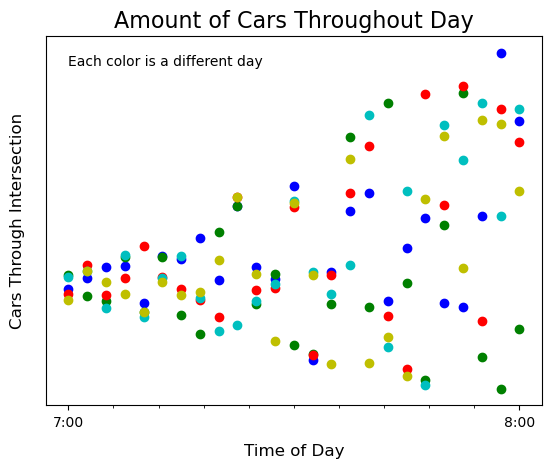

In [54]:
fig, ax = plt.subplots()
np.random.seed(19680801)
iterations = 5
colors = ['b','g','r','c','y']


x_axis = np.linspace(6,7,25)
y_axis= np.linspace(66, 70, 25)
n_list = np.linspace(1,11,25)

for i in range(iterations):
    y_scatter = [random.uniform(y-n,y+n) for y,n in zip(y_axis, n_list)]
    ax.scatter(x_axis,y_scatter, color=colors[i])


ax.set_title('Amount of Cars from 7:00 to 8:00', fontsize=16)
ax.set_ylabel('Cars Through Intersection', fontsize=12, labelpad=15)
ax.set_xlabel('Time of Day', fontsize=12, labelpad=10)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.text(6, 79, 'Each color is a different day')
plt.tick_params(left = False, labelleft = False)
plt.xticks([6, 7],["7:00", "8:00"])
plt.show()


As we observe this time period for each consecutive day, we notice that there is a pattern. We can use a machine learning model to predict what the following minutes past 8:00 will be given this data. 

The model we have chosen for this anticipated dataset is a linear regression machine learning model because a good approach for predicting future traffic flow based on this graph could involve minimizing the error from a good fitting equation.

First, we try to find an equation that fits this graph



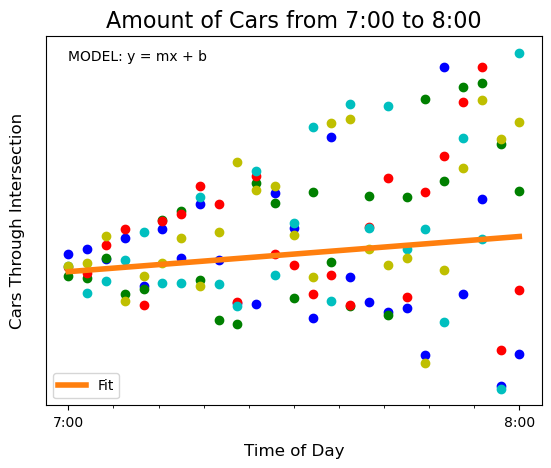

In [75]:
fig, ax = plt.subplots()
np.random.seed(19680801)
iterations = 5
colors = ['b','g','r','c','y']


x_axis = np.linspace(6,7,25)
y_axis= np.linspace(66, 70, 25)
n_list = np.linspace(1,11,25)

for i in range(iterations):
    y_scatter = [random.uniform(y-n,y+n) for y,n in zip(y_axis, n_list)]
    ax.scatter(x_axis,y_scatter, color=colors[i])

y_fit = [54 + x*2 for x in x_axis]
ax.plot(x_axis, y_fit, '-', color='tab:orange', linewidth=4, label='Fit')
ax.set_title('Amount of Cars from 7:00 to 8:00', fontsize=16)
ax.set_ylabel('Cars Through Intersection', fontsize=12, labelpad=15)
ax.set_xlabel('Time of Day', fontsize=12, labelpad=10)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))

plt.text(6, 78, 'MODEL: y = mx + b')
plt.tick_params(left = False, labelleft = False)
plt.xticks([6, 7],["7:00", "8:00"])
plt.legend()
plt.show()

This is just a line that fits to show an example of the model we will be using, which is a linear line in the form of y = mx + b

The goal of linear regression is to minimize the total error in our data. An error can be described as the difference between where our model is and where the data is. All the data points not along our model are an error.

So, to minimize the total error of our model, we use the Mean Square Error approach. 

Jacobian:

ML Model:

No need for normalization



In [2]:
#!pip install -U scikit-learn
!pip install prettytable
from prettytable import PrettyTable



In [10]:
dataTable = PrettyTable(["Time (S)","Day 1", "Day 2", "Day 3", "...", "Day n"])
seconds = 0
minutes = 0
for i in range(30):

    time_string = f"7:{minutes}:{seconds}"
    dataTable.add_row([time_string, "-","-","-","-","-"])
    seconds += 10
    if seconds == 60:
        seconds = 0
        minutes += 1
        
print(dataTable)

+----------+-------+-------+-------+-----+-------+
| Time (S) | Day 1 | Day 2 | Day 3 | ... | Day n |
+----------+-------+-------+-------+-----+-------+
|  7:0:0   |   -   |   -   |   -   |  -  |   -   |
|  7:0:10  |   -   |   -   |   -   |  -  |   -   |
|  7:0:20  |   -   |   -   |   -   |  -  |   -   |
|  7:0:30  |   -   |   -   |   -   |  -  |   -   |
|  7:0:40  |   -   |   -   |   -   |  -  |   -   |
|  7:0:50  |   -   |   -   |   -   |  -  |   -   |
|  7:1:0   |   -   |   -   |   -   |  -  |   -   |
|  7:1:10  |   -   |   -   |   -   |  -  |   -   |
|  7:1:20  |   -   |   -   |   -   |  -  |   -   |
|  7:1:30  |   -   |   -   |   -   |  -  |   -   |
|  7:1:40  |   -   |   -   |   -   |  -  |   -   |
|  7:1:50  |   -   |   -   |   -   |  -  |   -   |
|  7:2:0   |   -   |   -   |   -   |  -  |   -   |
|  7:2:10  |   -   |   -   |   -   |  -  |   -   |
|  7:2:20  |   -   |   -   |   -   |  -  |   -   |
|  7:2:30  |   -   |   -   |   -   |  -  |   -   |
|  7:2:40  |   -   |   -   |   

Once we have our data setup in this table, we are ready to introduce the scikit-learn.
Since the amount of cars for each separate day is not considered a separate feature of the data, we have to change this data set into two columns. One for time and one for the amount of cars for the appropriate time, no matter which day it is.

In [ ]:
X = time
y = number_of_cars

from sklearn.linear_model import LinearRegression

# test size should be Number of Days - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Activate our model
model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)




Evaluation will be measuring MSE as discussed before.
We can also use scikit-learn's MSA evaluation and RMSE

Remember, that a good performing model will have a lesser Error.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)